In [3]:
import pandas as pd

# this code uses mklearn and pandas

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import spearmanr
from pylab import  rcParams
from pandas import Series, DataFrame

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
#from matlplotlib import rcParams
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# load data from 'copy.csv' which is a copy of data.csv

In [20]:
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
df =pd.read_csv('copy.csv')
df.head()

,state,account_length,area_code,phone_number,...,intl_call,intl_charge,customer_service,churn
0,KS,128,415,382-4657,...,3,2.70,1,False.
1,OH,107,415,371-7191,...,3,3.70,1,False.
2,NJ,137,415,358-1921,...,5,3.29,0,False.
3,OH,84,408,375-9999,...,7,1.78,2,False.
4,OK,75,415,330-6626,...,3,2.73,3,False.


In [21]:
from preamble import *
import mglearn

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
y = df['churn']
z=df.state
h=df.phone_number
y = pd.get_dummies(y)[' True.']
X =df.drop(['churn','phone_number','state'],axis=1)

# change yes no to ones and zeros

In [24]:
X['international_plan'] = pd.get_dummies(X.international_plan)[' yes']
X['voice_mail'] = pd.get_dummies(X.voice_mail)[' yes']
#pd.get_dummies(X.voice_mail)

#train test set split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

# train the tree on train set and calculate accuracy

In [26]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train,y_train)))

Accuracy on the training subset: 1.000


# after find out the tree is over fitting  set max depth to 4

In [27]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy on the training subset: 0.931
Accuracy on the test subset: 0.923


# use graphviz to visualise the decision tree

In [28]:
import graphviz
from sklearn.tree import export_graphviz
cat_vars=['account_length','area_code','international_plan','voice_mail','vmail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','customer_service']

export_graphviz(tree,out_file='churn2.dot',class_names=['0','1'],feature_names=cat_vars,impurity=False,filled=True)

In [29]:
import sys

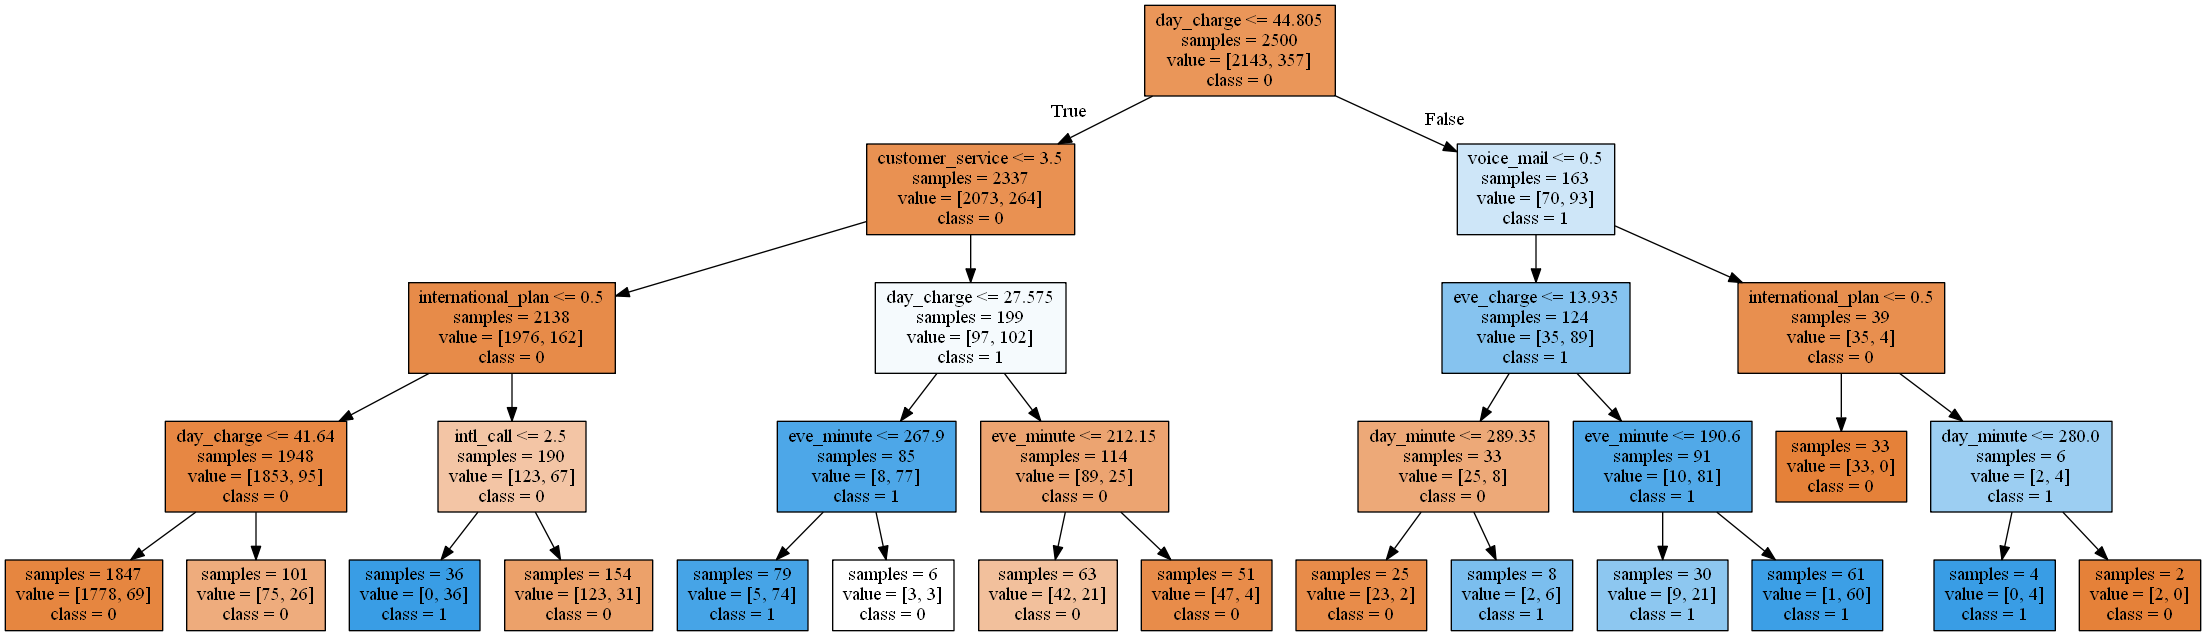

In [30]:
from IPython.display import Image
Image("churn.png")

# ten fold cross validation

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.908


# check the importance of each features

In [32]:
print('feature importance:{}'.format(tree.feature_importances_))
type(tree.feature_importances_)

feature importance:[0.    0.    0.113 0.07  0.    0.025 0.    0.369 0.028 0.    0.063 0.
 0.    0.    0.    0.116 0.    0.216]


numpy.ndarray

# visualise feature importance

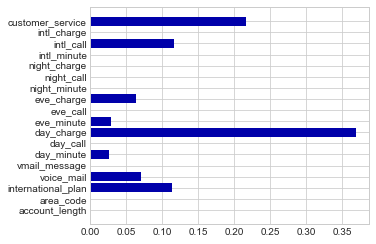

In [33]:
n_features=X.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cat_vars)
plt.show()

In [34]:
y_pred_prob = tree.predict_proba(X_test)[:,1]

# check the distribution of prodicted probabilities

Text(0,0.5,'Frequency')

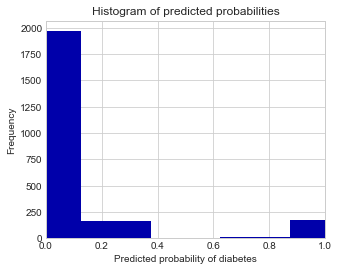

In [35]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# check roc curve and print the value of AUC

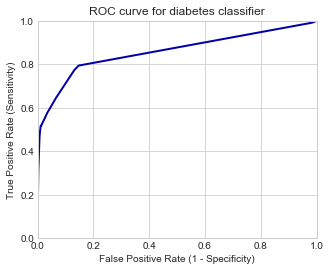

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [37]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.858126245847176
